# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [107]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()
import re
import os


%matplotlib inline

In [108]:
sns.set_theme(
    style = 'whitegrid'
    )

In [109]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
stars = []
country= []
date= []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para in parsed_content.find_all("div", class_ = "rating-10"):
        stars.append(para.span.get_text())
        
    for para in parsed_content.find_all("h3"):
        country.append(para.span.next_sibling.get_text().strip("( )"))
        
        
    for para in parsed_content.find_all('time'):
        date.append(para.get_text())
                
  
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [110]:
print(len(reviews))
print(len(country))
print(len(stars))
len(date)


1000
1000
1010


1000

### Create DataFrame

In [111]:
df = pd.DataFrame({"reviews":reviews,"stars": stars[0:1000], "date":date, "country": country})

In [112]:
df

,reviews,stars,date,country
0,✅ Trip Verified | My family and I have flown ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,9th July 2023,United Kingdom
1,✅ Trip Verified | This has been by far the wo...,4,9th July 2023,United States
2,✅ Trip Verified | In Nov 2022 I booked and pa...,2,8th July 2023,United Kingdom
3,Not Verified | BA is not treating its premium ...,2,6th July 2023,United Kingdom
4,✅ Trip Verified | 24 hours before our departu...,4,5th July 2023,South Africa
...,...,...,...,...
995,Not Verified | Glasgow to Miami via London. G...,2,7th September 2018,United Kingdom
996,✅ Trip Verified | London Heathrow to Budapest...,10,6th September 2018,United Kingdom
997,✅ Trip Verified | Budapest to London Heathrow...,7,5th September 2018,United Kingdom
998,✅ Trip Verified | London to Toronto. Group of...,6,3rd September 2018,Canada


In [113]:
df['stars'] = df['stars'].str.strip('\n \t')
df

,reviews,stars,date,country
0,✅ Trip Verified | My family and I have flown ...,5,9th July 2023,United Kingdom
1,✅ Trip Verified | This has been by far the wo...,4,9th July 2023,United States
2,✅ Trip Verified | In Nov 2022 I booked and pa...,2,8th July 2023,United Kingdom
3,Not Verified | BA is not treating its premium ...,2,6th July 2023,United Kingdom
4,✅ Trip Verified | 24 hours before our departu...,4,5th July 2023,South Africa
...,...,...,...,...
995,Not Verified | Glasgow to Miami via London. G...,2,7th September 2018,United Kingdom
996,✅ Trip Verified | London Heathrow to Budapest...,10,6th September 2018,United Kingdom
997,✅ Trip Verified | Budapest to London Heathrow...,7,5th September 2018,United Kingdom
998,✅ Trip Verified | London to Toronto. Group of...,6,3rd September 2018,Canada


In [114]:
df['verified']  = df.reviews.str.contains('Trip Verified')

In [115]:
df

,reviews,stars,date,country,verified
0,✅ Trip Verified | My family and I have flown ...,5,9th July 2023,United Kingdom,True
1,✅ Trip Verified | This has been by far the wo...,4,9th July 2023,United States,True
2,✅ Trip Verified | In Nov 2022 I booked and pa...,2,8th July 2023,United Kingdom,True
3,Not Verified | BA is not treating its premium ...,2,6th July 2023,United Kingdom,False
4,✅ Trip Verified | 24 hours before our departu...,4,5th July 2023,South Africa,True
...,...,...,...,...,...
995,Not Verified | Glasgow to Miami via London. G...,2,7th September 2018,United Kingdom,False
996,✅ Trip Verified | London Heathrow to Budapest...,10,6th September 2018,United Kingdom,True
997,✅ Trip Verified | Budapest to London Heathrow...,7,5th September 2018,United Kingdom,True
998,✅ Trip Verified | London to Toronto. Group of...,6,3rd September 2018,Canada,True


In [116]:
df.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
dtype: object

In [117]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()

corpus =[]
reviews_data = df.reviews.str.strip("✅ Trip Verified |")

for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [118]:
df['corpus'] = corpus

In [119]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | My family and I have flown ...,5,9th July 2023,United Kingdom,True,family flown mostly british airway last year p...
1,✅ Trip Verified | This has been by far the wo...,4,9th July 2023,United States,True,far worst service plane obvious flying economy...
2,✅ Trip Verified | In Nov 2022 I booked and pa...,2,8th July 2023,United Kingdom,True,nov booked paid return journey new zealand ret...
3,Not Verified | BA is not treating its premium ...,2,6th July 2023,United Kingdom,False,verified ba treating premium economy passenger...
4,✅ Trip Verified | 24 hours before our departu...,4,5th July 2023,South Africa,True,hour departure ba cape town heathrow thursday ...


In [120]:
df.date= pd.to_datetime(df.date)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [121]:
df.dtypes

reviews             object
stars               object
date        datetime64[ns]
country             object
verified              bool
corpus              object
dtype: object

In [122]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | My family and I have flown ...,5,2023-07-09,United Kingdom,True,family flown mostly british airway last year p...
1,✅ Trip Verified | This has been by far the wo...,4,2023-07-09,United States,True,far worst service plane obvious flying economy...
2,✅ Trip Verified | In Nov 2022 I booked and pa...,2,2023-07-08,United Kingdom,True,nov booked paid return journey new zealand ret...
3,Not Verified | BA is not treating its premium ...,2,2023-07-06,United Kingdom,False,verified ba treating premium economy passenger...
4,✅ Trip Verified | 24 hours before our departu...,4,2023-07-05,South Africa,True,hour departure ba cape town heathrow thursday ...


In [123]:
df.isnull().sum()

reviews     0
stars       0
date        0
country     0
verified    0
corpus      0
dtype: int64

In [124]:
df.stars.value_counts()

1     328
2     119
10    100
3      96
9      82
8      69
5      59
4      58
7      50
6      39
Name: stars, dtype: int64

In [125]:
df.country.value_counts()

United Kingdom           565
United States            165
Australia                 35
Canada                    32
South Africa              19
Germany                   16
Netherlands               11
Sweden                    11
Ireland                   10
Switzerland               10
United Arab Emirates      10
France                     9
India                      9
Malaysia                   8
Italy                      7
Spain                      7
Greece                     6
Hong Kong                  6
Belgium                    5
Singapore                  4
Poland                     4
New Zealand                3
Ghana                      3
Qatar                      3
Argentina                  3
Thailand                   3
Austria                    2
Norway                     2
Romania                    2
Mexico                     2
Brazil                     2
Saudi Arabia               2
Czech Republic             2
Taiwan                     1
Japan         

In [126]:
import nltk 

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /home/abolfazl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abolfazl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/abolfazl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/abolfazl/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/abolfazl/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [127]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
              newlist.append(tuple([word, pos_dict.get(tag[0])]))
        
    return newlist 

df['POS tagged'] = df['corpus'].apply(token_stop_pos)


In [128]:
df.head()

,reviews,stars,date,country,verified,corpus,POS tagged
0,✅ Trip Verified | My family and I have flown ...,5,2023-07-09,United Kingdom,True,family flown mostly british airway last year p...,"[(family, n), (flown, v), (mostly, r), (britis..."
1,✅ Trip Verified | This has been by far the wo...,4,2023-07-09,United States,True,far worst service plane obvious flying economy...,"[(far, r), (worst, a), (service, n), (plane, n..."
2,✅ Trip Verified | In Nov 2022 I booked and pa...,2,2023-07-08,United Kingdom,True,nov booked paid return journey new zealand ret...,"[(nov, r), (booked, v), (paid, v), (return, n)..."
3,Not Verified | BA is not treating its premium ...,2,2023-07-06,United Kingdom,False,verified ba treating premium economy passenger...,"[(verified, v), (ba, n), (treating, v), (premi..."
4,✅ Trip Verified | 24 hours before our departu...,4,2023-07-05,South Africa,True,hour departure ba cape town heathrow thursday ...,"[(hour, n), (departure, n), (ba, n), (cape, n)..."


In [129]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
            
            
    return lemma_rew

In [130]:
df['Lemma'] = df['POS tagged'].apply(lemmatize)

In [131]:
df.head()

,reviews,stars,date,country,verified,corpus,POS tagged,Lemma
0,✅ Trip Verified | My family and I have flown ...,5,2023-07-09,United Kingdom,True,family flown mostly british airway last year p...,"[(family, n), (flown, v), (mostly, r), (britis...",family fly mostly british airway last year p...
1,✅ Trip Verified | This has been by far the wo...,4,2023-07-09,United States,True,far worst service plane obvious flying economy...,"[(far, r), (worst, a), (service, n), (plane, n...",far bad service plane obvious fly economy fr...
2,✅ Trip Verified | In Nov 2022 I booked and pa...,2,2023-07-08,United Kingdom,True,nov booked paid return journey new zealand ret...,"[(nov, r), (booked, v), (paid, v), (return, n)...",nov book pay return journey new zealand retu...
3,Not Verified | BA is not treating its premium ...,2,2023-07-06,United Kingdom,False,verified ba treating premium economy passenger...,"[(verified, v), (ba, n), (treating, v), (premi...",verify ba treat premium economy passenger re...
4,✅ Trip Verified | 24 hours before our departu...,4,2023-07-05,South Africa,True,hour departure ba cape town heathrow thursday ...,"[(hour, n), (departure, n), (ba, n), (cape, n)...",hour departure ba cape town heathrow thursda...


In [132]:
df[['reviews', 'Lemma']]

,reviews,Lemma
0,✅ Trip Verified | My family and I have flown ...,family fly mostly british airway last year p...
1,✅ Trip Verified | This has been by far the wo...,far bad service plane obvious fly economy fr...
2,✅ Trip Verified | In Nov 2022 I booked and pa...,nov book pay return journey new zealand retu...
3,Not Verified | BA is not treating its premium ...,verify ba treat premium economy passenger re...
4,✅ Trip Verified | 24 hours before our departu...,hour departure ba cape town heathrow thursda...
...,...,...
995,Not Verified | Glasgow to Miami via London. G...,verify glasgow miami via london glasgow heat...
996,✅ Trip Verified | London Heathrow to Budapest...,london heathrow budapest much disappointing ...
997,✅ Trip Verified | Budapest to London Heathrow...,budapest london heathrow flight depart time ...
998,✅ Trip Verified | London to Toronto. Group of...,london toronto group people age business cla...


In [133]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [140]:
def analyse(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']


In [141]:
df['Sentiment'] = df['Lemma'].apply(analyse)


In [142]:
df

,reviews,stars,date,country,verified,corpus,POS tagged,Lemma,Sentiment
0,✅ Trip Verified | My family and I have flown ...,5,2023-07-09,United Kingdom,True,family flown mostly british airway last year p...,"[(family, n), (flown, v), (mostly, r), (britis...",family fly mostly british airway last year p...,0.9422
1,✅ Trip Verified | This has been by far the wo...,4,2023-07-09,United States,True,far worst service plane obvious flying economy...,"[(far, r), (worst, a), (service, n), (plane, n...",far bad service plane obvious fly economy fr...,0.2500
2,✅ Trip Verified | In Nov 2022 I booked and pa...,2,2023-07-08,United Kingdom,True,nov booked paid return journey new zealand ret...,"[(nov, r), (booked, v), (paid, v), (return, n)...",nov book pay return journey new zealand retu...,-0.5801
3,Not Verified | BA is not treating its premium ...,2,2023-07-06,United Kingdom,False,verified ba treating premium economy passenger...,"[(verified, v), (ba, n), (treating, v), (premi...",verify ba treat premium economy passenger re...,0.6597
4,✅ Trip Verified | 24 hours before our departu...,4,2023-07-05,South Africa,True,hour departure ba cape town heathrow thursday ...,"[(hour, n), (departure, n), (ba, n), (cape, n)...",hour departure ba cape town heathrow thursda...,-0.7713
...,...,...,...,...,...,...,...,...,...
995,Not Verified | Glasgow to Miami via London. G...,2,2018-09-07,United Kingdom,False,verified glasgow miami via london glasgow heat...,"[(verified, v), (glasgow, a), (miami, n), (via...",verify glasgow miami via london glasgow heat...,0.9579
996,✅ Trip Verified | London Heathrow to Budapest...,10,2018-09-06,United Kingdom,True,london heathrow budapest much disappointing ex...,"[(london, n), (heathrow, n), (budapest, r), (m...",london heathrow budapest much disappointing ...,-0.0258
997,✅ Trip Verified | Budapest to London Heathrow...,7,2018-09-05,United Kingdom,True,budapest london heathrow flight departed time ...,"[(budapest, a), (london, n), (heathrow, n), (f...",budapest london heathrow flight depart time ...,0.0000
998,✅ Trip Verified | London to Toronto. Group of...,6,2018-09-03,Canada,True,london toronto group people age business class...,"[(london, r), (toronto, a), (group, n), (peopl...",london toronto group people age business cla...,0.9777


In [149]:
def analyse_rv(rate):
    if rate >= 0.5:
        return 'Positive'
    elif rate<= 0 :
        return 'Negative'
    else :
        return 'normal'


In [151]:
df['Opinion'] = df['Sentiment'].apply(analyse_rv)

In [153]:
df.head()


,reviews,stars,date,country,verified,corpus,POS tagged,Lemma,Sentiment,Opinion
0,✅ Trip Verified | My family and I have flown ...,5,2023-07-09,United Kingdom,True,family flown mostly british airway last year p...,"[(family, n), (flown, v), (mostly, r), (britis...",family fly mostly british airway last year p...,0.9422,Positive
1,✅ Trip Verified | This has been by far the wo...,4,2023-07-09,United States,True,far worst service plane obvious flying economy...,"[(far, r), (worst, a), (service, n), (plane, n...",far bad service plane obvious fly economy fr...,0.2500,normal
2,✅ Trip Verified | In Nov 2022 I booked and pa...,2,2023-07-08,United Kingdom,True,nov booked paid return journey new zealand ret...,"[(nov, r), (booked, v), (paid, v), (return, n)...",nov book pay return journey new zealand retu...,-0.5801,Negative
3,Not Verified | BA is not treating its premium ...,2,2023-07-06,United Kingdom,False,verified ba treating premium economy passenger...,"[(verified, v), (ba, n), (treating, v), (premi...",verify ba treat premium economy passenger re...,0.6597,Positive
4,✅ Trip Verified | 24 hours before our departu...,4,2023-07-05,South Africa,True,hour departure ba cape town heathrow thursday ...,"[(hour, n), (departure, n), (ba, n), (cape, n)...",hour departure ba cape town heathrow thursda...,-0.7713,Negative


In [155]:
df['Opinion'].value_counts()

Positive    496
Negative    393
normal      111
Name: Opinion, dtype: int64

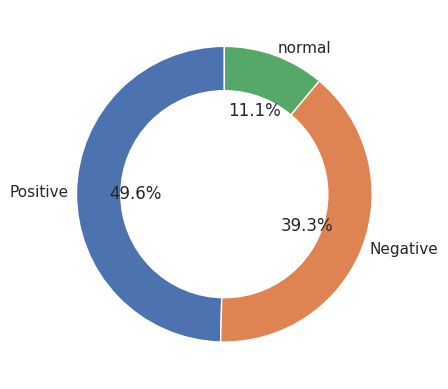

In [173]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

my_circle = plt.Circle((0, 0), 0.7, color='white')

d = plt.pie([0.496,0.393, 0.111], labels=['Positive', 'Negative', 'normal'], autopct='%1.1f%%',
            startangle=90, labeldistance=1.05)

plt.gca().add_artist(my_circle)